In [4]:
# Imports

import requests
from bs4 import BeautifulSoup
import re
from playwright.async_api import async_playwright
import pandas as pd
import time
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [5]:
# Prepping df. I guess this is just what you have to do when getting a list from a csv file? I should have made a function out of it lol

df = pd.read_csv('../data/judiciary.csv')

for i in range(len(df)):
    df['orgs'][i] = df['orgs'][i].split(',')
    df['orgs'][i] = [x.strip() for x in df['orgs'][i]]

for i in range(len(df)):
    df['orgs'][i] = [x.replace('[','') for x in df['orgs'][i]]
    df['orgs'][i] = [x.replace(']','') for x in df['orgs'][i]]

for i in range(len(df)):
    df['docs'][i] = df['docs'][i].split(',')
    df['docs'][i] = [x.strip() for x in df['docs'][i]]

for i in range(len(df)):
    df['docs'][i] = [x.replace('[','') for x in df['docs'][i]]
    df['docs'][i] = [x.replace(']','') for x in df['docs'][i]]

for i in range(len(df)):
    df['doc_links'][i] = df['doc_links'][i].split(',')
    df['doc_links'][i] = [x.strip() for x in df['doc_links'][i]]

for i in range(len(df)):
    df['doc_links'][i] = [x.replace('[','') for x in df['doc_links'][i]]
    df['doc_links'][i] = [x.replace(']','') for x in df['doc_links'][i]]

pd.to_datetime(df['date'])

df.head()

,name,position,docs,doc_links,date,orgs,district
0,Gordon P. Gallagher,united states district judge for the district of colorado,"['Colorado DA Rubinstein Support For Gallagher', 'Former MCBA Presidents And Attorneys Support For Gallagher', 'Former CO US Attorneys Support For Gallagher', 'Grand Junction Legal Community Support For Gallagher', 'HAP And Mesa County Libraries Support For Gallagher', 'Mesa County DAs And Sheriffs Support For Gallagher', 'Riverside Educational Center Support For Gallagher', 'Ute Mountain Ute Tribe Support For Gallagher', 'Western CO Attorneys Support For Gallagher']","['https://www.judiciary.senate.gov/colorado-da-rubinstein-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/former-mcba-presidents-and-attorneys-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/former-co-us-attorneys-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/grand-junction-legal-community-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/hap-and-mesa-county-libraries-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/mesa-county-das-and-sheriffs-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/riverside-educational-center-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/ute-mountain-ute-tribe-support-for-gallagher&download=1', 'https://www.judiciary.senate.gov/western-co-attorneys-support-for-gallagher&download=1']","Tuesday, December 13, 2022","['Colorado DA Rubinstein', 'Former MCBA Presidents And Attorneys', 'Former CO US Attorneys', 'Grand Junction Legal Community', 'HAP And Mesa County Libraries', 'Mesa County DAs And Sheriffs', 'Riverside Educational Center', 'Ute Mountain Ute Tribe', 'Western CO Attorneys']",district of colorado
1,P. Casey Pitts,united states district judge for the northern district of california,"['Former AAG Eric Dreiband Support For Pitts', 'Stephen Cannon Support For Pitts', 'National Education Association Support For Pitts', 'William Baude Support For Pitts', 'FCC Deputy GC Boizelle Support For Pitts']","['https://www.judiciary.senate.gov/former-aag-eric-dreiband-support-for-pitts&download=1', 'https://www.judiciary.senate.gov/stephen-cannon-support-for-pitts&download=1', 'https://www.judiciary.senate.gov/national-education-association-support-for-pitts&download=1', 'https://www.judiciary.senate.gov/william-baude-support-for-pitts&download=1', 'https://www.judiciary.senate.gov/fcc-deputy-gc-boizelle-support-for-pitts&download=1']","Tuesday, December 13, 2022","['Former AAG Eric Dreiband', 'Stephen Cannon', 'National Education Association', 'William Baude', 'FCC Deputy GC Boizelle']",northern district of california
2,Andrew G. Schopler,united states district judge for the southern district of california,"['Major General Mark Malanka Support For Schopler', 'Judge Irma Gonzalez Support For Schopler', 'Former Law Clerks Letter Of Support For Schopler', 'Harvard Law School Classmates Letter Of Support For Schopler']","['https://www.judiciary.senate.gov/major-general-mark-malanka-support-for-schopler&download=1', 'https://www.judiciary.senate.gov/judge-irma-gonzalez-support-for-schopler&download=1', 'https://www.judiciary.senate.gov/former-law-clerks-letter-of-support-for-schopler&download=1', 'https://www.judiciary.senate.gov/harvard-law-school-classmates-letter-of-support-for-schopler&download=1']","Tuesday, December 13, 2022","['Major General Mark Malanka', 'Judge Irma Gonzalez', 'Former Law Clerks', 'Harvard Law School Classmates']",southern district of california
3,Arun Subramanian,united states district judge for the southern district of new york,"['Former SCOTUS Clerks Support For Subramanian', 'SABANY/AABANY/SABANA Support For Subramanian', 'Colleagues At Susman Godfrey Support For Subramanian', 'Columbia Law Review Board Support For Subramanian', 'Co-Counsel Eric Havian Support For Subramanian', 'Columbia Law Review Support For Subramanian']","['https://www.judic

In [6]:
org_df = pd.read_csv('../output/orgs.csv')
pd.to_datetime(org_df['date'])

org_df.head()

,org,name,position,date,district
0,Colorado DA Rubinstein,Gordon P. Gallagher,united states district judge for the district of colorado,"Tuesday, December 13, 2022",district of colorado
1,Former MCBA Presidents And Attorneys,Gordon P. Gallagher,united states district judge for the district of colorado,"Tuesday, December 13, 2022",district of colorado
2,Former CO US Attorneys,Gordon P. Gallagher,united states district judge for the district of colorado,"Tuesday, December 13, 2022",district of colorado
3,Grand Junction Legal Community,Gordon P. Gallagher,united states district judge for the district of colorado,"Tuesday, December 13, 2022",district of colorado
4,HAP And Mesa County Libraries,Gordon P. Gallagher,united states district judge for the district of colorado,"Tuesday, December 13, 2022",district of colorado


<AxesSubplot: >

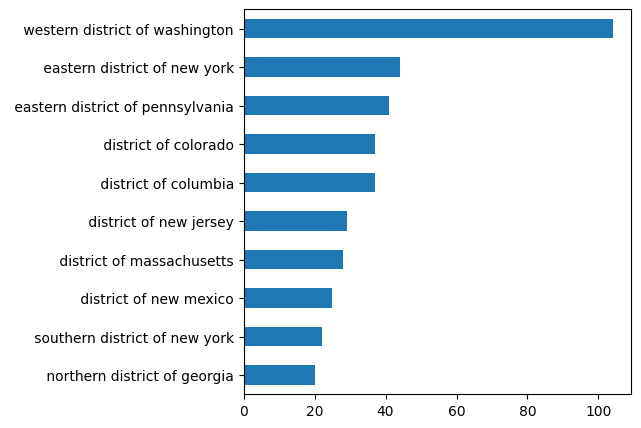

In [7]:
org_df.district.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5))

<AxesSubplot: >

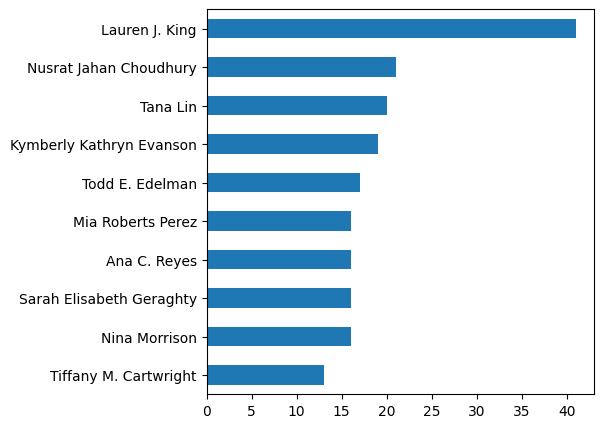

In [8]:
org_df.name.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5))

<AxesSubplot: >

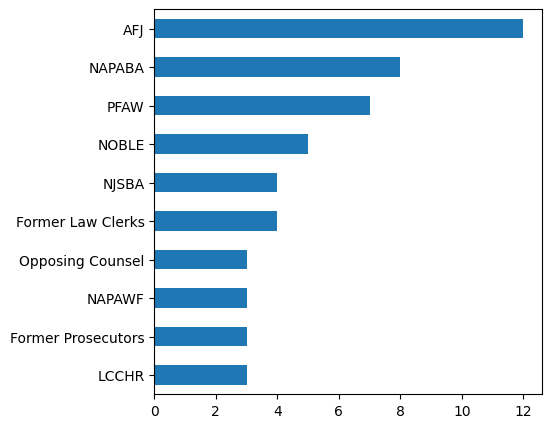

In [9]:
org_df.org.value_counts().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(5,5))